# LGMVIP TASK 1 : Iris Flowers Classification ML Project

# Author : Kaustuk Kale

# Importing the required modules

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [2]:
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#delete unrequired columns
df=df.drop(columns="Id")
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#display the stats about the dataset
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
#to display basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#to display number of samples on each class
df["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

# Preprocessing the Data

In [7]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploratory Data Analysis

<AxesSubplot:>

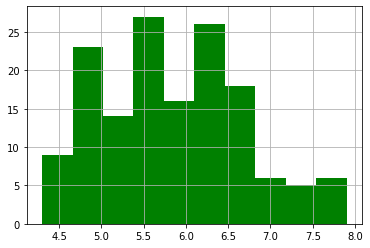

In [8]:
#Barplot 
df["SepalLengthCm"].hist(color="Green")

<AxesSubplot:>

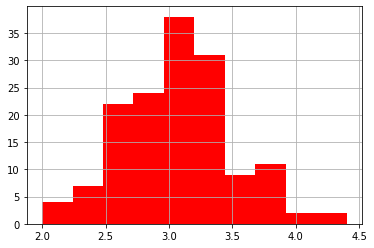

In [9]:
df["SepalWidthCm"].hist(color="Red")

<AxesSubplot:>

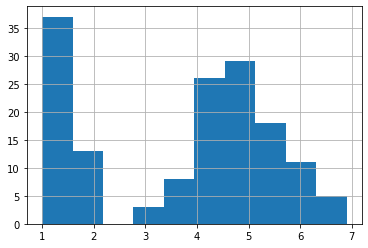

In [10]:
df["PetalLengthCm"].hist()

<AxesSubplot:>

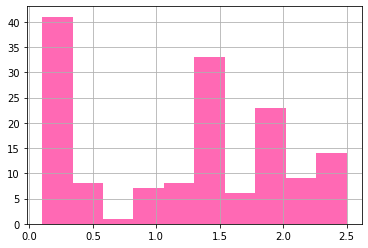

In [11]:
df["PetalWidthCm"].hist(color="hotpink")

In [12]:
#Scatterplot

color=["hotpink","orange","green"]
species=["Iris-setosa","Iris-virginica","Iris-versicolor"]


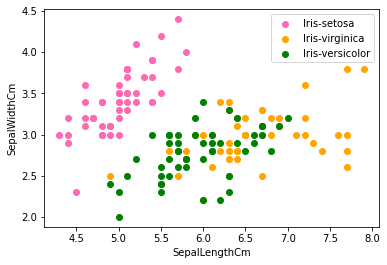

In [13]:
for i in range(3):
    x=df[df["Species"]== species[i]]
    plt.scatter(x["SepalLengthCm"],x["SepalWidthCm"],c=color[i],label=species[i])
    plt.xlabel("SepalLengthCm")
    plt.ylabel("SepalWidthCm")
    plt.legend()


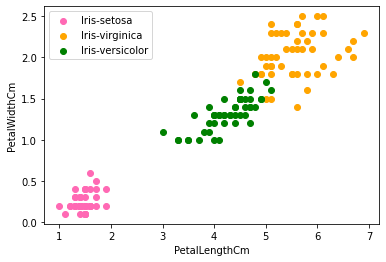

In [14]:
for i in range(3):
    x=df[df["Species"]== species[i]]
    plt.scatter(x["PetalLengthCm"],x["PetalWidthCm"],c=color[i],label=species[i])
    plt.xlabel("PetalLengthCm")
    plt.ylabel("PetalWidthCm")
    plt.legend()


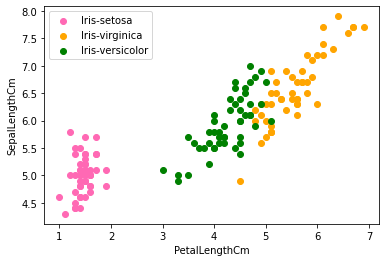

In [15]:
for i in range(3):
    x=df[df["Species"]== species[i]]
    plt.scatter(x["PetalLengthCm"],x["SepalLengthCm"],c=color[i],label=species[i])
    plt.xlabel("PetalLengthCm")
    plt.ylabel("SepalLengthCm")
    plt.legend()


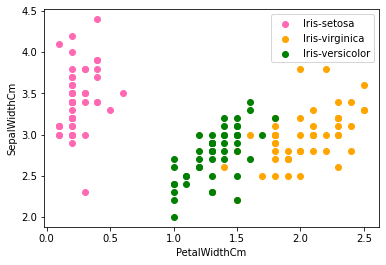

In [16]:
for i in range(3):
    x=df[df["Species"]== species[i]]
    plt.scatter(x["PetalWidthCm"],x["SepalWidthCm"],c=color[i],label=species[i])
    plt.xlabel("PetalWidthCm")
    plt.ylabel("SepalWidthCm")
    plt.legend()

# Correlation Matrix

In [17]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

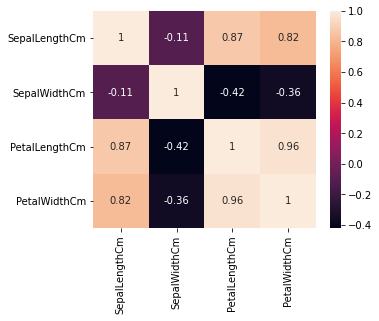

In [18]:
corr=df.corr()
fig,ax =plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax)

In [19]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Species"]=le.fit_transform(df["Species"])

In [20]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Training the Model

In [39]:
#Logistic Regression

#train- 80
#test- 20
from sklearn.model_selection import train_test_split
x=df.drop(columns="Species")
y=df["Species"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [42]:
print("Accuracy: ",lr.score(x_test,y_test)*100)

Accuracy:  97.77777777777777


In [43]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [44]:
print("Accuracy: ",dtc.score(x_test,y_test)*100)

Accuracy:  86.66666666666667


In [45]:
#KNN- K Nearest Neighbours Classifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [46]:
print("Accuracy: ",knn.score(x_test,y_test)*100)

Accuracy:  95.55555555555556
